# SVM classification with anisotropy factors

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import utils

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
CI02 = utils.load_data("data/for_learning_plus/CI02.npy")
CI04 = utils.load_data("data/for_learning_plus/CI04.npy")
CI06 = utils.load_data("data/for_learning_plus/CI06.npy")
CI09 = utils.load_data("data/for_learning_plus/CI09.npy")
CI21 = utils.load_data("data/for_learning_plus/CI21.npy")

In [3]:
data = CI02
sub_data = data[(2*data["dist2GB"] + data["dist2TJ"] < 60)]

In [4]:
X = sub_data[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatness_an']] 

y = sub_data['Y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_set random 20%

In [5]:
clf = svm.SVC(kernel="rbf",class_weight='balanced')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

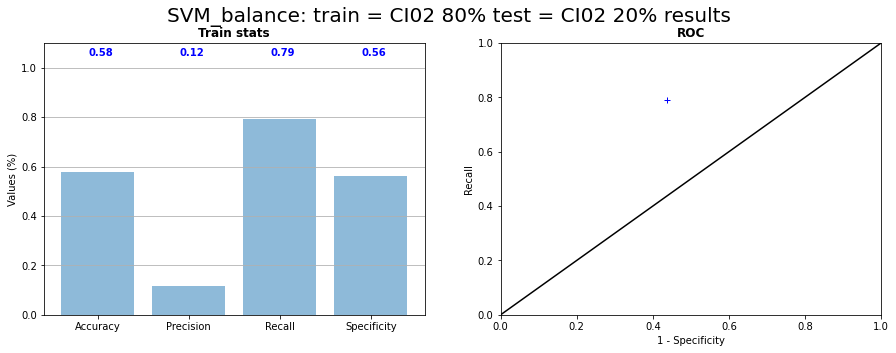

In [6]:
acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="SVM_balance: train = CI02 80% test = CI02 20%")

In [7]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)  
plt.show()

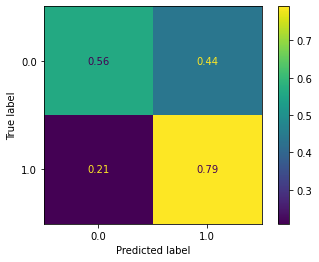

In [8]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,normalize="true")  
plt.show()

## Predict on CI02

In [9]:
X_val = CI02[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatness_an']] 
y_val = CI02['Y'] 

In [10]:
y_pred = clf.predict(X_val)

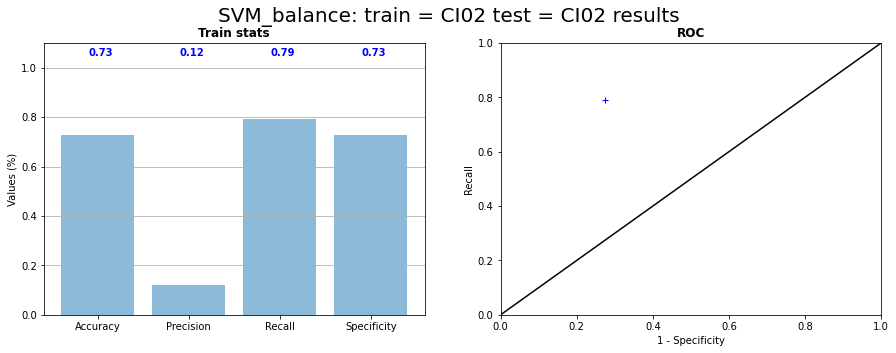

In [11]:
acc = metrics.accuracy_score(y_val, y_pred)
prec = metrics.precision_score(y_val, y_pred)
rec = metrics.recall_score(y_val, y_pred)
cm = metrics.confusion_matrix(y_val, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="SVM_balance: train = CI02 test = CI02")

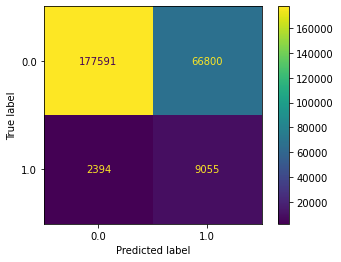

In [12]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)  
plt.show()

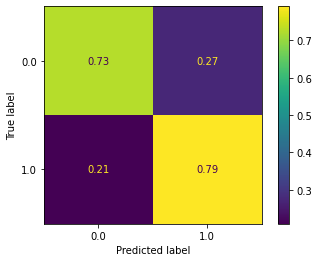

In [13]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize="true")  
plt.show()

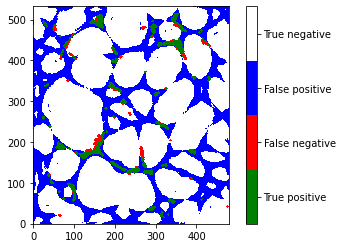

In [14]:
im_shape = np.shape(np.load("data/for_learning_plus/CI02.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

## Predict on CI06

In [15]:
X_val = CI06[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatness_an']] 
y_val = CI06['Y'] 

In [16]:
y_pred = clf.predict(X_val)

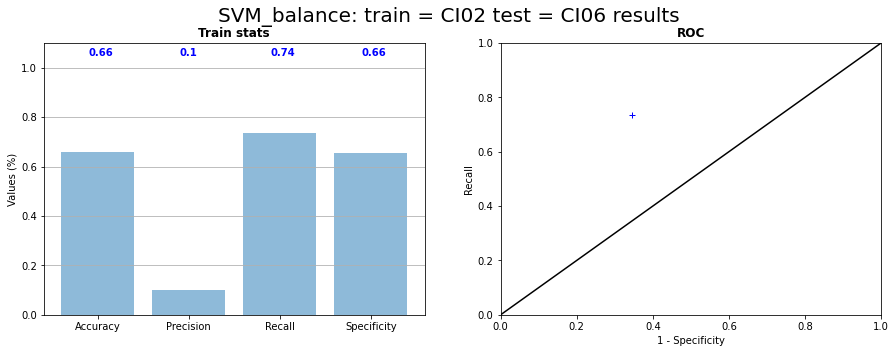

In [17]:
acc = metrics.accuracy_score(y_val, y_pred)
prec = metrics.precision_score(y_val, y_pred)
rec = metrics.recall_score(y_val, y_pred)
cm = metrics.confusion_matrix(y_val, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="SVM_balance: train = CI02 test = CI06")

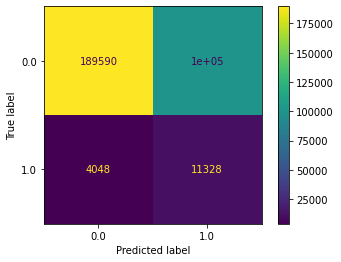

In [18]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)  
plt.show()

In [19]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize="true")  
plt.show()

In [20]:
im_shape = np.shape(np.load("data/for_learning_plus/CI06.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)